# Earthqueke Data of Turkey (1900-2023)

The aim of this notebook is to analyze and visualize the data of earthquakes that occurred(1900-2023) in Turkey. These analyzed data were taken from AFAD(https://deprem.afad.gov.tr/event-catalog).

Note:Contains magnitude greater than 3.9


According to  U.S. Geological Survey documents: 

|Magnitude| |Description|
|---------| |------------|
|4 - 4.9|  |Minor|
|5 - 5.9|  |Moderate|
|6 - 6.9|  |Strong|
|7 - 7.9|  |Major|
|8 - 8.9|  |Great|
 

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import matplotlib as mpl
import folium
%matplotlib inline

In [3]:
df = pd.read_csv("deprem.csv")

In [4]:
df.head()

Date  Longitude  Latitude  Depth   Rms Type  Magnitude  \
0  2023-02-19T12:04:32     38.233    38.277   7.00  0.40   MW        4.7   
1  2023-02-19T06:55:38     37.167    37.521  10.39  0.28   MW        4.0   
2  2023-02-19T05:46:34     37.190    37.474  11.99  0.38   MW        4.0   
3  2023-02-19T04:07:40     36.835    37.236   4.98  0.29   MW        4.5   
4  2023-02-19T03:59:11     36.825    37.250  10.07  0.40   MW        4.3   

                       Location  EventID  
0           Yeşilyurt (Malatya)   550239  
1  Dulkadiroğlu (Kahramanmaraş)   550153  
2  Dulkadiroğlu (Kahramanmaraş)   550128  
3           Nurdağı (Gaziantep)   550087  
4      Türkoğlu (Kahramanmaraş)   550085

## A first look over the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3382 entries, 0 to 3381
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3382 non-null   object 
 1   Longitude  3382 non-null   float64
 2   Latitude   3382 non-null   float64
 3   Depth      3382 non-null   float64
 4   Rms        3382 non-null   float64
 5   Type       3382 non-null   object 
 6   Magnitude  3382 non-null   float64
 7   Location   3382 non-null   object 
 8   EventID    3382 non-null   int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 237.9+ KB


In [6]:
df.isnull().sum()

Date         0
Longitude    0
Latitude     0
Depth        0
Rms          0
Type         0
Magnitude    0
Location     0
EventID      0
dtype: int64

In [7]:
df.describe().T

count           mean            std         min            25%  \
Longitude  3382.0      33.151393       5.780855     24.7892      27.710175   
Latitude   3382.0      38.202559       1.578054     33.9088      37.120650   
Depth      3382.0      13.927300      12.146741      0.0000       7.000000   
Rms        3382.0       0.455736       0.373185      0.0000       0.230000   
Magnitude  3382.0       4.341455       0.408671      4.0000       4.000000   
EventID    3382.0  320711.125074  151163.429751  50689.0000  236328.250000   

                   50%           75%          max  
Longitude      31.2650      38.19380      44.7523  
Latitude       38.1976      39.27145      43.7587  
Depth          10.8000      16.80000     140.2700  
Rms             0.4300       0.66000       5.6572  
Magnitude       4.2000       4.50000       7.7000  
EventID    256928.5000  477566.50000  550239.0000

In [8]:
df

Date  Longitude  Latitude  Depth   Rms Type  Magnitude  \
0     2023-02-19T12:04:32     38.233    38.277   7.00  0.40   MW        4.7   
1     2023-02-19T06:55:38     37.167    37.521  10.39  0.28   MW        4.0   
2     2023-02-19T05:46:34     37.190    37.474  11.99  0.38   MW        4.0   
3     2023-02-19T04:07:40     36.835    37.236   4.98  0.29   MW        4.5   
4     2023-02-19T03:59:11     36.825    37.250  10.07  0.40   MW        4.3   
...                   ...        ...       ...    ...   ...  ...        ...   
3377  1990-04-20T23:30:05     40.000    39.810  21.00  0.00   Md        5.2   
3378  1990-03-21T11:10:40     38.000    40.000   1.00  1.00   Md        4.0   
3379  1990-03-05T17:37:20     36.000    41.000   1.00  0.00   Md        4.0   
3380  1990-03-05T02:59:38     40.710    38.470   8.00  0.00   Md        4.1   
3381  1990-02-26T16:28:12     34.000    41.000   1.00  1.00   Md        4.0   

                          Location  EventID  
0              Yeşilyurt (Malatya)   550239  
1     Dulkadiroğlu (Kahramanmaraş)   550153  
2     Dulkadiroğlu (Kahramanmaraş)   550128  
3              Nurdağı (Gaziantep)   550087  
4         Türkoğlu (Kahramanmaraş)   550085  
...                            ...      ...  
3377            Çayırlı (Erzincan)   238027  
3378               Suşehri (Sivas)   238006  
3379                Kavak (Samsun)   238005  
3380             Lice (Diyarbakır)   238004  
3381             Tosya (Kastamonu)   238002  

[3382 rows x 9 columns]

**What will we do on the dataframe:**
- Reshape Date column(split as date and time)
- Add City column(a column containing only city names)
- Add Classification column bases on magnitude 
- Finish new dataframe 

## New DataFrame

In [9]:
def swap_all_dataframe_columns(dataframe, new_column):
    
    #Replaces all columns in the given DataFrame.
    
    return dataframe.reindex(columns=new_column)

In [10]:
#function that creates a description classification based on a value of magnitude  

def Description_classification(x):    
    if x > 3.9 and x < 5:
        return 'minor'
    elif x >= 5 and x < 6:
        return 'moderate'
    elif x >= 6 and x < 7:
        return 'strong'
    elif x >= 7 and x < 8:
        return 'major'
    else:
        return 'great'

In [11]:
# Split as time and date and create two new columns as "Time" and "Date" 
df["Date"] = pd.to_datetime(df["Date"]) 
df["date"]=df["Date"].dt.date
df["Time"]=df["Date"].dt.time

In [12]:
#Rename and drop old Date column
df = df.drop('Date', axis=1,)
df = df.rename(columns={"date": "Date"})
df.columns

Index(['Longitude', 'Latitude', 'Depth', 'Rms', 'Type', 'Magnitude',
       'Location', 'EventID', 'Date', 'Time'],
      dtype='object')

In [13]:
#format tpye of Date
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")


In [14]:
# to find the city in brackets
pattern = re.compile(r'\((.*?)\)')

# Create a new column and find word in brackets 
df['City'] = df['Location'].apply(lambda x: pattern.findall(x)[0])

#Check that write all city
total_city_number = df["City"].nunique()
print("Total number of cities:", total_city_number)

Total number of cities: 82


In [15]:
#create a classification column
df['Classification'] = df['Magnitude'].apply(Description_classification)

In [16]:
df_new = swap_all_dataframe_columns(df, ['EventID','Date', 'Time', 'City', 'Location', 'Magnitude', 'Classification', 'Depth', 'Longitude', 'Latitude', 'Rms', 'Type',])

In [17]:
df_new

EventID       Date      Time           City  \
0      550239 2023-02-19  12:04:32        Malatya   
1      550153 2023-02-19  06:55:38  Kahramanmaraş   
2      550128 2023-02-19  05:46:34  Kahramanmaraş   
3      550087 2023-02-19  04:07:40      Gaziantep   
4      550085 2023-02-19  03:59:11  Kahramanmaraş   
...       ...        ...       ...            ...   
3377   238027 1990-04-20  23:30:05       Erzincan   
3378   238006 1990-03-21  11:10:40          Sivas   
3379   238005 1990-03-05  17:37:20         Samsun   
3380   238004 1990-03-05  02:59:38     Diyarbakır   
3381   238002 1990-02-26  16:28:12      Kastamonu   

                          Location  Magnitude Classification  Depth  \
0              Yeşilyurt (Malatya)        4.7          minor   7.00   
1     Dulkadiroğlu (Kahramanmaraş)        4.0          minor  10.39   
2     Dulkadiroğlu (Kahramanmaraş)        4.0          minor  11.99   
3              Nurdağı (Gaziantep)        4.5          minor   4.98   
4         Türkoğlu (Kahramanmaraş)        4.3          minor  10.07   
...                            ...        ...            ...    ...   
3377            Çayırlı (Erzincan)        5.2       moderate  21.00   
3378               Suşehri (Sivas)        4.0          minor   1.00   
3379                Kavak (Samsun)        4.0          minor   1.00   
3380             Lice (Diyarbakır)        4.1          minor   8.00   
3381             Tosya (Kastamonu)        4.0          minor   1.00   

      Longitude  Latitude   Rms Type  
0        38.233    38.277  0.40   MW  
1        37.167    37.521  0.28   MW  
2        37.190    37.474  0.38   MW  
3        36.835    37.236  0.29   MW  
4        36.825    37.250  0.40   MW  
...         ...       ...   ...  ...  
3377     40.000    39.810  0.00   Md  
3378     38.000    40.000  1.00   Md  
3379     36.000    41.000  0.00   Md  
3380     40.710    38.470  0.00   Md  
3381     34.000    41.000  1.00   Md  

[3382 rows x 12 columns]

We obtained the new dataframe and we will do some look over it.

In [18]:
df_new.isnull().sum()

EventID           0
Date              0
Time              0
City              0
Location          0
Magnitude         0
Classification    0
Depth             0
Longitude         0
Latitude          0
Rms               0
Type              0
dtype: int64

In [19]:
df_new["Classification"].value_counts(), print("Class and number of earthquakes so far:")

Class and number of earthquakes so far:


(minor       3065
 moderate     294
 strong        18
 major          5
 Name: Classification, dtype: int64,
 None)

In [20]:
df_new.corr()

EventID  Magnitude     Depth  Longitude  Latitude       Rms
EventID    1.000000   0.012382 -0.167376   0.049284 -0.162500 -0.059813
Magnitude  0.012382   1.000000  0.065209   0.030520 -0.009081  0.013618
Depth     -0.167376   0.065209  1.000000  -0.220804 -0.292051  0.127075
Longitude  0.049284   0.030520 -0.220804   1.000000  0.231796  0.034766
Latitude  -0.162500  -0.009081 -0.292051   0.231796  1.000000 -0.249770
Rms       -0.059813   0.013618  0.127075   0.034766 -0.249770  1.000000

## Visualisation of Dataframe

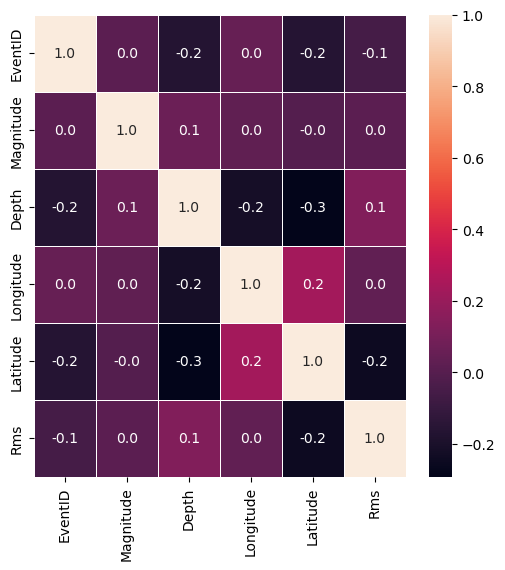

In [21]:
f,ax = plt.subplots(figsize=(6, 6))
sns.heatmap(df_new.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

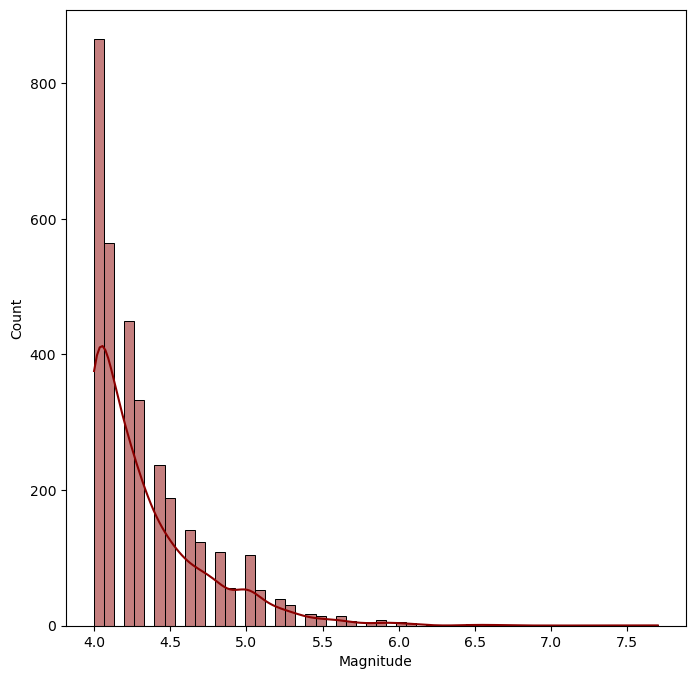

In [22]:
plt.figure(figsize=(8,8))
sns.histplot(df_new.Magnitude, kde=True,color="darkred");

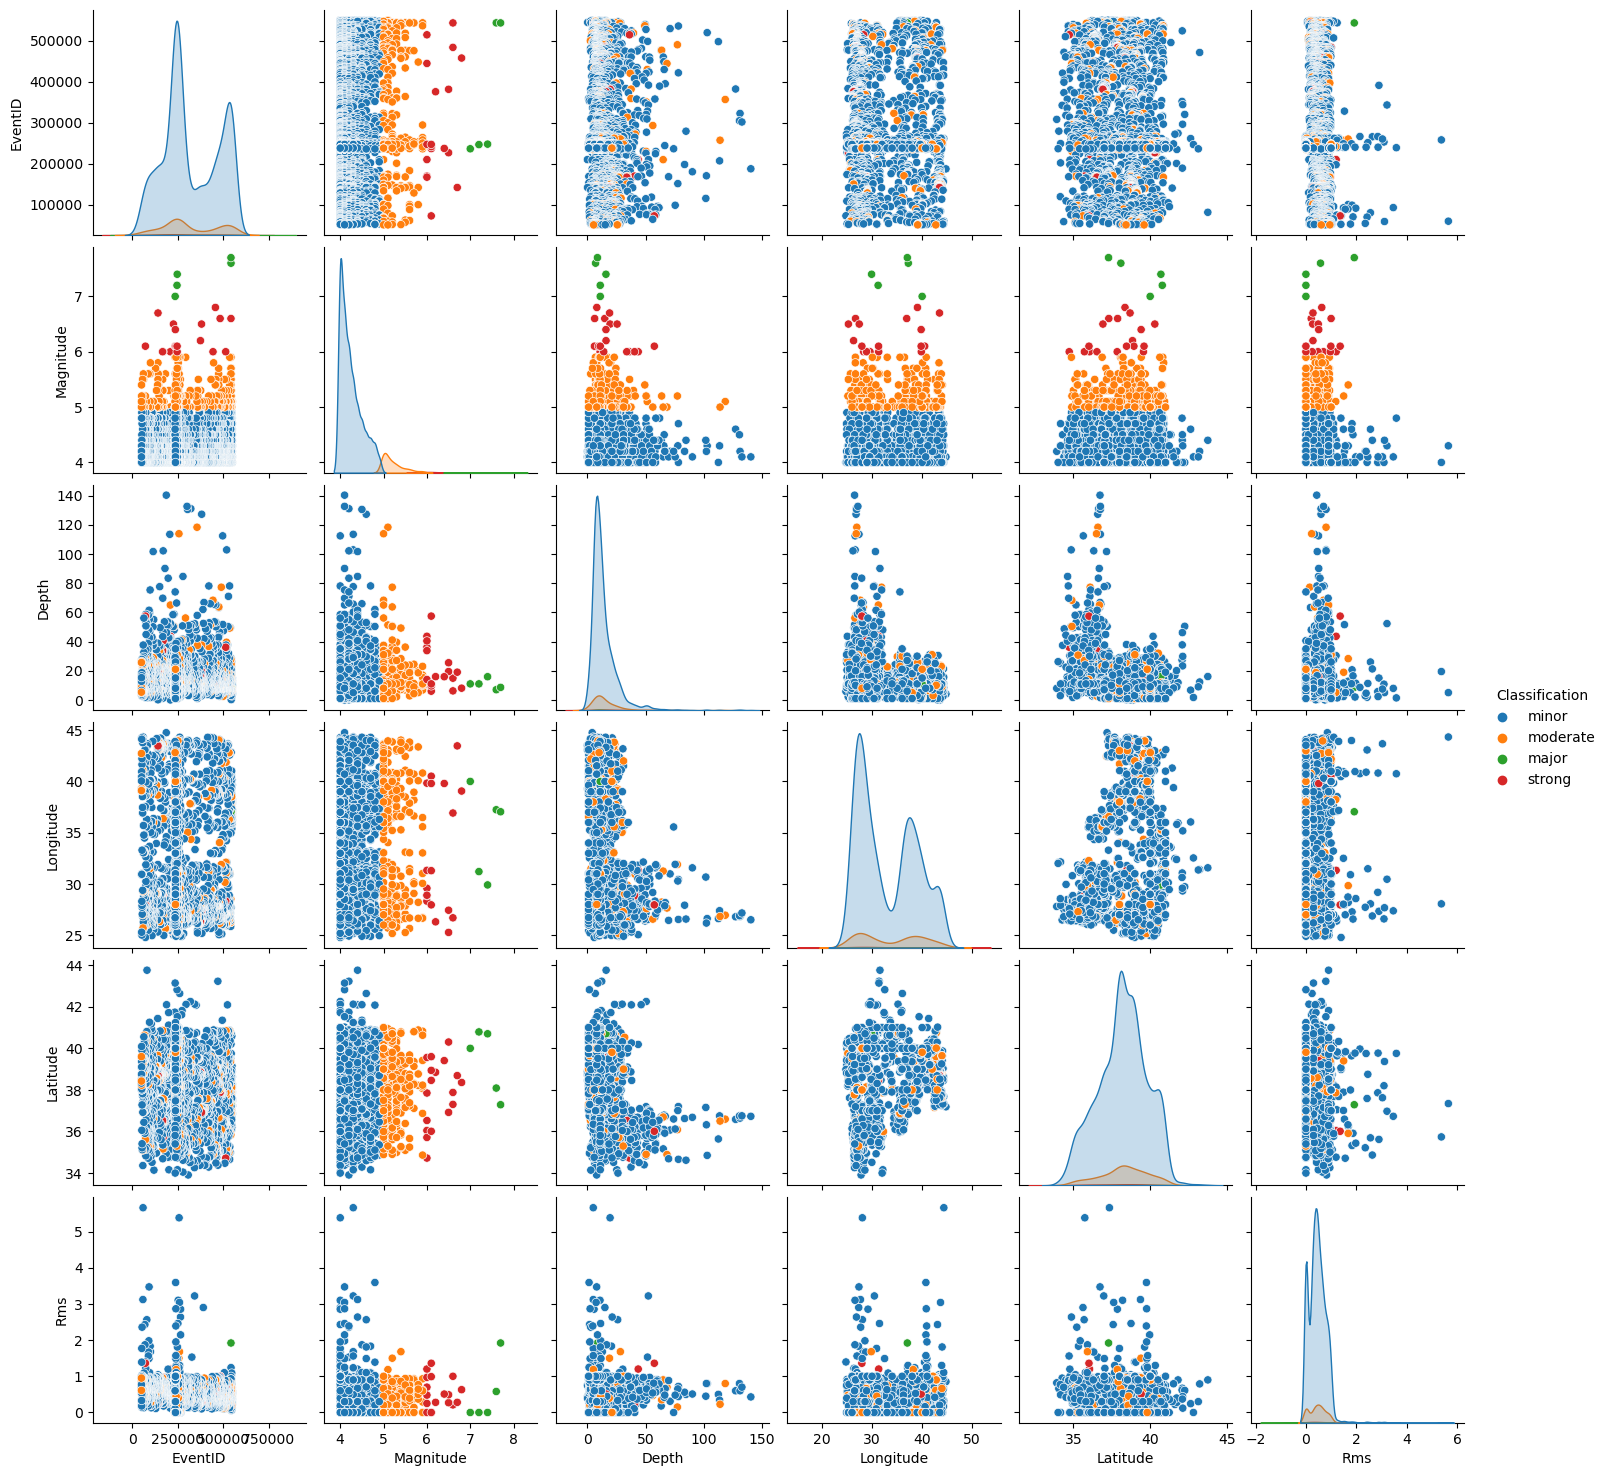

In [23]:
pair_plot = sns.pairplot(df_new, hue="Classification");

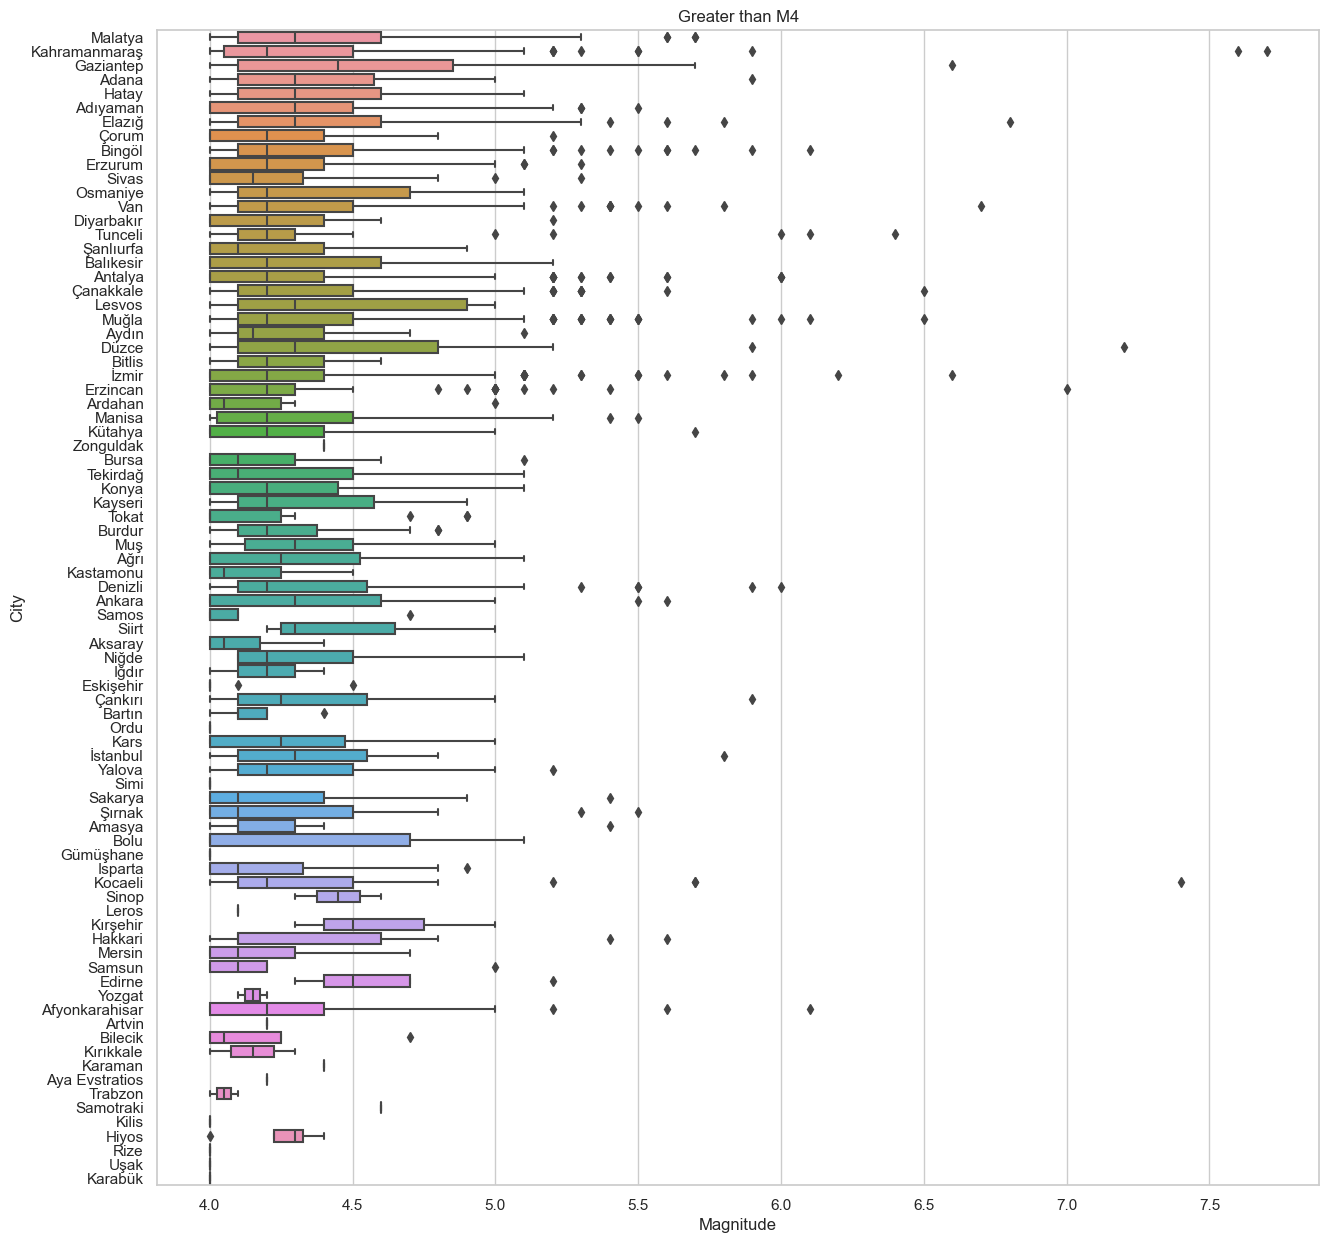

In [24]:
figure = plt.figure(figsize=(15,15))

sns.set_theme(style="whitegrid", palette="pastel")
sns.boxplot(x=df_new["Magnitude"], y=df_new["City"])
plt.title("Greater than M4")
plt.show()

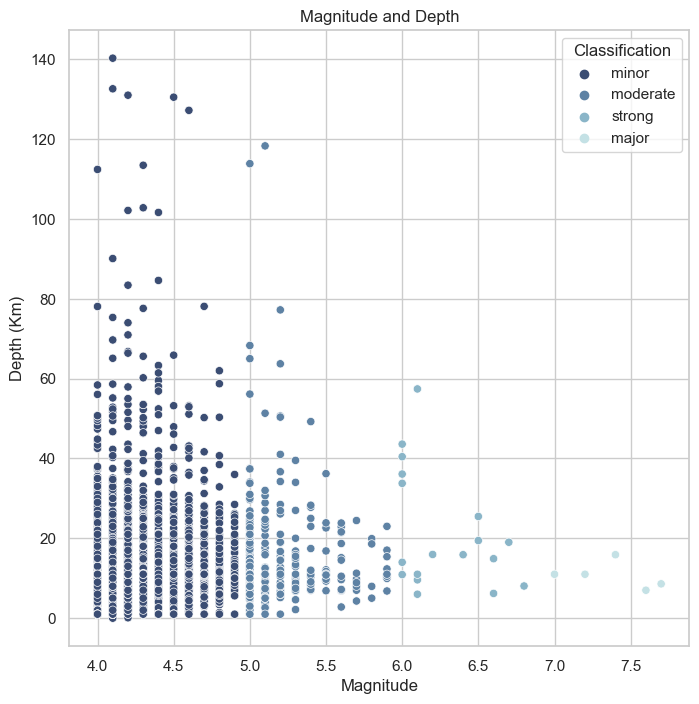

In [25]:
plt.figure(figsize=(8,8))
sns.set_theme(style="whitegrid")
sns.scatterplot(x="Magnitude", y ="Depth", hue="Classification",
                hue_order=["minor", "moderate","strong","major"],
                palette="ch:r=-.2,d=.3_r",
                data=df_new)
plt.title("Magnitude and Depth")
plt.ylabel("Depth (Km)")
plt.show()

In [26]:
# Create a new dataframe which magnitude value greater than 5.9

mag_df = pd.DataFrame(df_new[df_new["Magnitude"] > 6])
mag_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 394 to 3283
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   EventID         17 non-null     int64         
 1   Date            17 non-null     datetime64[ns]
 2   Time            17 non-null     object        
 3   City            17 non-null     object        
 4   Location        17 non-null     object        
 5   Magnitude       17 non-null     float64       
 6   Classification  17 non-null     object        
 7   Depth           17 non-null     float64       
 8   Longitude       17 non-null     float64       
 9   Latitude        17 non-null     float64       
 10  Rms             17 non-null     float64       
 11  Type            17 non-null     object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(5)
memory usage: 1.7+ KB


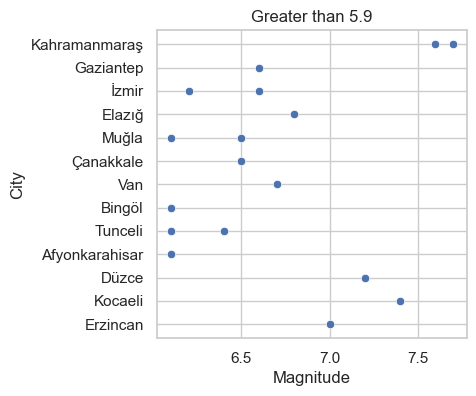

In [27]:
# Plot this new dataframe 

figure = plt.figure(figsize=(4,4))

sns.set_theme(style="whitegrid")
sns.scatterplot(x=mag_df["Magnitude"], y=mag_df["City"])
plt.title("Greater than 5.9")
plt.show()

In [28]:
df_eq = df_new['Magnitude'] 

# Loading the background map
eq_map = folium.Map(location=[38.9573415, 35.240741], zoom_start=5, tiles='Stamen Terrain', width=1250)

# Adding a dot for each earthquake
for idx, eq in df_new.iterrows():
    folium.Circle(location=(eq['Latitude'], eq['Longitude']), 
                   color='brown', 
                  fill=True).add_to(eq_map)
eq_map